# Tardos codes - Experiments

In [1]:
import tardos

In [2]:
def generate_codes(n_users, code_length, epsilon=0.1, seed=101):
    """
    Generates Tardos codes for a specified number of users based on epsilon.

    Args:
        n_users (int): Number of users.
        epsilon (float): Parameter to control the error probability.

    Returns:
        np.ndarray: A matrix of Tardos codes of shape (n_users, code_length).
        np.ndarray: The probability vector used to generate the codes.
    """
    np.random.seed(seed)
    # Calculate the code length
    # code_length = calculate_code_length(n_users, epsilon)
    print(f"Code length: {code_length}")

    # Initialize the probability vector
    probabilities = np.random.beta(0.5, 0.5, size=code_length)

    # Generate the Tardos codes
    codes = np.zeros((n_users, code_length), dtype=int)
    for user in range(n_users):
        np.random.seed(user)
        codes[user] = (np.random.rand(code_length) < probabilities).astype(int)

    return codes, probabilities

In [3]:
def generate_code(user_id, code_length, epsilon=0.1, seed=101):
    """
    Generates Tardos codes for a specified number of users based on epsilon.

    Args:
        n_users (int): Number of users.
        epsilon (float): Parameter to control the error probability.

    Returns:
        np.ndarray: A matrix of Tardos codes of shape (n_users, code_length).
        np.ndarray: The probability vector used to generate the codes.
    """
    # Calculate the code length
    # code_length = calculate_code_length(n_users, epsilon)
    print(f"Code length: {code_length}")

    # Initialize the probability vector
    np.random.seed(seed)  # for reproducibility
    probabilities = np.random.beta(0.5, 0.5, size=code_length)

    # Generate the Tardos code
    np.random.seed(user_id)
    code = (np.random.rand(code_length) < probabilities).astype(int)

    return code, probabilities

In [4]:
def accusation(codes, marked_code, probabilities, threshold):
    """
    Tardos fingerprinting accusation mechanism.

    Args:
        codes (np.ndarray): Matrix of Tardos codes of shape (n_users, code_length).
        marked_code (np.ndarray): The marked code suspected of collusion.
        probabilities (np.ndarray): Probability vector used in the Tardos code generation.
        threshold (float): The threshold for suspicion scores to accuse a user.

    Returns:
        list: Indices of suspected colluders.
        np.ndarray: Suspicion scores for all users.
    """    
    n_users, code_length = codes.shape
    scores = np.zeros(n_users)  # Suspicion scores for all users

    # Calculate suspicion scores for each user
    for user in range(n_users):
        for pos in range(code_length):
            if marked_code[pos] == 1:
                score_update = np.log(1 / probabilities[pos]) if codes[user, pos] == 1 else np.log(1 / (1 - probabilities[pos]))
                scores[user] += score_update
                #print('Score update: ', score_update)
            else:
                score_update = np.log(1 / (1 - probabilities[pos])) if codes[user, pos] == 1 else np.log(1 / probabilities[pos])
                scores[user] += score_update
                #print('Score update: ', score_update)
            
            #scores[user] += score_update
            # if pos==8:
            #     print(f"Probability {probabilities[pos]}. Marked code is here {marked_code[pos]} and the user has {codes[user, pos] }; score update: {score_update}")

    # Identify colluders based on threshold
    colluders = [user for user in range(n_users) if scores[user] > threshold]

    return colluders, scores

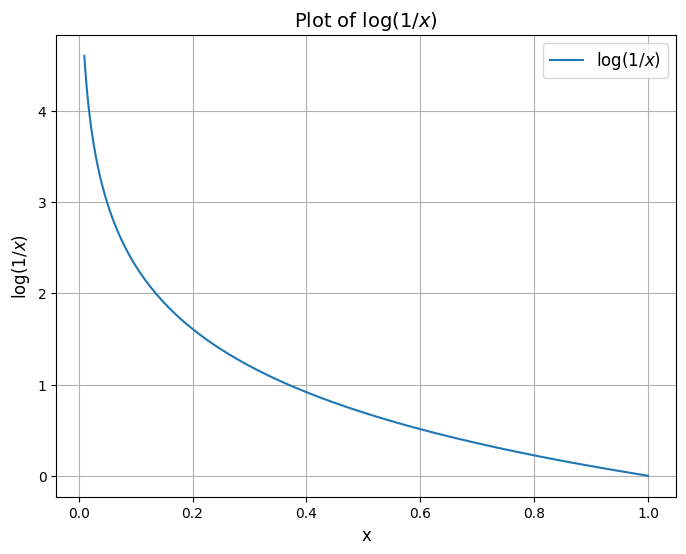

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values, avoiding x = 0 to prevent division by zero or undefined log
x = np.linspace(0.01, 1, 500)  # Values between 0.01 and 1

# Define the function y = log(1/x)
y = np.log(1 / x)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r"$\log(1/x)$")
plt.xlabel("x", fontsize=12)
plt.ylabel(r"$\log(1/x)$", fontsize=12)
plt.title("Plot of $\log(1/x)$", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


In [6]:
def accusation_without_p(marked_code, n_users, seed, threshold):
    """
    Tardos fingerprinting accusation mechanism.

    Args:
        codes (np.ndarray): Matrix of Tardos codes of shape (n_users, code_length).
        marked_code (np.ndarray): The marked code suspected of collusion.
        probabilities (np.ndarray): Probability vector used in the Tardos code generation.
        threshold (float): The threshold for suspicion scores to accuse a user.

    Returns:
        list: Indices of suspected colluders.
        np.ndarray: Suspicion scores for all users.
    """    
    #n_users, code_length = codes.shape
    scores = np.zeros(n_users)  # Suspicion scores for all users

    # retreive probabilities
    code_length = len(marked_code)
    np.random.seed(seed)
    probabilities = np.random.beta(0.5, 0.5, size=code_length)

    # Generate the Tardos codes
    codes = np.zeros((n_users, code_length), dtype=int)
    for user in range(n_users):
        np.random.seed(user)
        codes[user] = (np.random.rand(code_length) < probabilities).astype(int)

    # Calculate suspicion scores for each user
    for user in range(n_users):
        for pos in range(code_length):
            if marked_code[pos] == 1:
                score_update = np.log(1 / probabilities[pos]) if codes[user, pos] == 1 else np.log(1 / (1 - probabilities[pos]))
                scores[user] += score_update
                #print('Score update: ', score_update)
            else:
                score_update = np.log(1 / (1 - probabilities[pos])) if codes[user, pos] == 1 else np.log(1 / probabilities[pos])
                scores[user] += score_update
                #print('Score update: ', score_update)
            
            #scores[user] += score_update
            # if pos==8:
            #     print(f"Probability {probabilities[pos]}. Marked code is here {marked_code[pos]} and the user has {codes[user, pos] }; score update: {score_update}")

    # Identify colluders based on threshold
    colluders = [user for user in range(n_users) if scores[user] > threshold]

    return colluders, scores

In [7]:
# parameters
n_users = 20 
code_length = 256
secret_key = 101

In [8]:
code, p = generate_code(0, code_length, seed=secret_key)
codes, p = generate_codes(n_users=n_users, code_length=code_length, seed=secret_key)

Code length: 256
Code length: 256


Tardos code generation:
- high probability --> most likely the bit is 1, i.e. most of the users have 1 in this position
- low probability --> most likely the bit is 0, i.e. most of the users have a 0 in this position

This can be observed in the generated codes:

In [9]:
marked_code = np.where(codes[1] == codes[4], codes[1], 1)
accusation(codes, marked_code, p, 195)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 array([347.16025286, 371.46783436, 342.01641724, 342.15655805,
        362.56636272, 331.24883058, 337.24286521, 326.77081764,
        341.04114396, 341.3838445 , 335.91104651, 348.32877696,
        348.1658196 , 343.59134981, 346.78719193, 351.88910496,
        350.57134054, 338.51592916, 352.555269  , 349.1346149 ]))

In [10]:
# try with the functions from the script
code = tardos.generate(0, secret_key, code_length)
codes, p = tardos.generate_codebook(n_users=n_users, secret_key=secret_key, fp_len=code_length)

Code length:  256


In [11]:
marked_code = np.where(codes[1] == codes[4], codes[1], 1)
tardos.score_users(marked_code, secret_key, n_users)

Scores:  [347.16025286 371.46783436 342.01641724 342.15655805 362.56636272
 331.24883058 337.24286521 326.77081764 341.04114396 341.3838445
 335.91104651 348.32877696 348.1658196  343.59134981 346.78719193
 351.88910496 350.57134054 338.51592916 352.555269   349.1346149 ]


{0: 347.1602528641891,
 1: 371.4678343623348,
 2: 342.01641724493595,
 3: 342.1565580519642,
 4: 362.5663627174718,
 5: 331.2488305818849,
 6: 337.24286521251736,
 7: 326.77081763504805,
 8: 341.0411439625959,
 9: 341.3838445004792,
 10: 335.91104651396876,
 11: 348.3287769564067,
 12: 348.1658196022654,
 13: 343.59134981131183,
 14: 346.78719193107764,
 15: 351.88910496165937,
 16: 350.57134054487824,
 17: 338.51592916275166,
 18: 352.555268997602,
 19: 349.1346148998872}

In [12]:
tardos.detect_colluders(marked_code, secret_key, n_users, k=1.0)

Scores:  [347.16025286 371.46783436 342.01641724 342.15655805 362.56636272
 331.24883058 337.24286521 326.77081764 341.04114396 341.3838445
 335.91104651 348.32877696 348.1658196  343.59134981 346.78719193
 351.88910496 350.57134054 338.51592916 352.555269   349.1346149 ]
Dynamic threshold:  355.27689383312685


[1, 4]

## Collusion by averaging the dataset values

In [13]:
import sys
sys.path.insert(0, '../../dissertation')  # make the script standalone for running on server

from datasets import *
from NCorrFP_scheme.NCorrFP import *

In [14]:
data = CovertypeSample()
scheme = NCorrFP(gamma=5, fingerprint_bit_length=code_length, k=300, number_of_recipients=n_users, fingerprint_code_type='tardos')

In [15]:
fp_data = scheme.insertion(data, secret_key=secret_key, recipient_id=0, correlated_attributes=data.correlated_attributes, save_computation=True)

Start the NCorr fingerprint insertion algorithm...
	gamma: 5
	correlated attributes: [['Elevation', 'Horizontal_Distance_To_Roadways'], ['Hillshade_3pm', 'Hillshade_9am', 'Aspect'], ['Slope', 'Hillshade_Noon'], ['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Hydrology']]

Generated a tardos fingerprint for recipient 0: 0001101001001011100001001100111011001000110101011001011110001011100001010001111110101001001010000001101000011000010100010100111101111100001111111011100010110100010110111101010010111011001001101011101111111101100111111110000010000001111110100101101110100001
Inserting the fingerprint...

Training balltrees in: 0.2507 sec.
Fingerprint inserted.
Runtime: 46.45 sec.
{'query_time': 10.86238408088684, 'write_time': 1.369281530380249, 'read_time': 0.08297848701477051, 'mark_time': 31.08462381362915}


In [16]:
fp_data1 = scheme.insertion(data, secret_key=secret_key, recipient_id=1, correlated_attributes=data.correlated_attributes, save_computation=True)

Start the NCorr fingerprint insertion algorithm...
	gamma: 5
	correlated attributes: [['Elevation', 'Horizontal_Distance_To_Roadways'], ['Hillshade_3pm', 'Hillshade_9am', 'Aspect'], ['Slope', 'Hillshade_Noon'], ['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Hydrology']]

Generated a tardos fingerprint for recipient 1: 1011101011001010111010000001101111001010001001011010011111001011100001011001110000001000001011000010100000101010011000011111111101101101000111111111110011110100010111101110011001110001001000111110100001000101100011111010100010000001111010001001101100100000
Inserting the fingerprint...

Training balltrees in: 0.2484 sec.
Fingerprint inserted.
Runtime: 49.31 sec.
{'query_time': 11.793401002883911, 'write_time': 1.4756720066070557, 'read_time': 0.08585619926452637, 'mark_time': 32.64358186721802}


In [17]:
dataframes = [fp_data, fp_data1]

In [18]:
# collude by averaging the disagreeing values

ref_shape = dataframes[0].shape
ref_columns = dataframes[0].columns
if not all(df.shape == ref_shape and df.columns.equals(ref_columns) for df in dataframes):
    raise ValueError("All DataFrames must have the same shape and columns.")

# Stack all DataFrames along a new axis to allow comparison across all values
stacked = np.stack([df.values for df in dataframes])

# Calculate where disagreements occur by checking if all values along the new axis are the same
disagreements = np.any(stacked != stacked[0, :, :], axis=0)

# Calculate the mean along the new axis for all positions
mean_values = np.mean(stacked, axis=0)

# Create the merged DataFrame
merged_df = pd.DataFrame(stacked[0], columns=ref_columns).copy()
merged_df.values[disagreements] = mean_values[disagreements]

In [19]:
detected_fp, votes, suspect_probvec = scheme.detection(merged_df, secret_key=secret_key,
                                                                       primary_key='Id',
                                                                       correlated_attributes=data.correlated_attributes)

Start NCorr fingerprint detection algorithm ...
	gamma: 5
	k: 300
	fp length: 256
	total # recipients: 20
	correlated attributes: [['Elevation', 'Horizontal_Distance_To_Roadways'], ['Hillshade_3pm', 'Hillshade_9am', 'Aspect'], ['Slope', 'Hillshade_Noon'], ['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Hydrology']]
Training balltrees in: 0.272 sec.
Fingerprint detected: 1011101001001010111010001000101111001000101001011000011110001011100001010001110110101001001012000011101000211000011100011101111101111101000111111011110011110100010111111101010000110001001000111111101011111101100011111010200010000001111210101001101100100001
[[4, 15], [17, 2], [11, 12], [1, 22], [6, 22], [24, 1], [1, 30], [26, 4], [12, 11], [0, 18], [23, 5], [13, 0], [1, 28], [26, 1], [1, 13], [15, 14], [2, 16], [12, 18], [9, 10], [16, 3], [10, 16], [18, 14], [26, 2], [22, 3], [7, 10], [18, 16], [25, 0], [13, 11], [0, 21], [17, 12], [3, 34], [7, 10], [1, 19], [1, 18], [25, 2], [20, 1], [3, 24], [21, 3], [12, 8]

In [20]:
# detected fp
np.array([int(i) for i in "10011010010010101120110002001211110010001010010110010111100010111000010110011101100010010010110000111020000110000111000111001111"])

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [21]:
code1 = np.array([int(i) for i in "00011010010010111000010011001110110010001101010110010111100010111000010100011111101010010010100000011010000110000101000101001111"])
code2 = np.array([int(i) for i in "10111010110010101110100000011011110010100010010110100111110010111000010110011100000010000010110000101000001010100110000111111111"])

In [22]:
code1

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [23]:
# merge fps like we did in the previous example
marked_code = np.where(code1 == code2, code1, 1)

In [24]:
marked_code

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
scores = tardos.detect_colluders(marked_code, secret_key, total_n_recipients=20, k=0.9)
scores

Scores:  [193.45354496 204.21480789 184.23910206 186.75593994 192.19450842
 181.1266868  184.85052034 185.67715635 186.60620289 184.50319986
 179.54219359 187.53472336 193.02189875 188.30294174 189.6853404
 184.28188375 188.09309684 187.20459212 189.88508827 195.15325886]
Dynamic threshold:  193.12002592502384


[0, 1, 19]

In [26]:
scores = tardos.detect_colluders(detected_fp, secret_key, total_n_recipients=20, k=0.9)
scores

Scores:  [371.36075808 359.15674789 359.90514442 369.37067481 370.3111803
 343.9508418  355.04411919 349.51668037 357.7234845  363.30532459
 358.68466025 372.76726885 354.54537406 365.33262245 367.48270097
 362.20400132 369.48086746 365.59994538 370.3165305  360.3637961 ]
Dynamic threshold:  369.10372222041906


[0, 3, 4, 11, 16, 18]